<a href="https://colab.research.google.com/github/yfranci/neurocognitive-analysis-schizoaffective/blob/main/neurocognitive_analysis_schizoaffective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Load the data
url = 'https://www.dropbox.com/s/q9i31bli8rmugpm/Neurocognitive%20Measures%20in%20Psychiatric%20Groups%20-%20NeuroCog.csv.csv?dl=1'

# Replace 'your_data.csv' with the path to your data file
data = pd.read_csv(url)

# Let's take a look at the first few rows of the data
print(data.head())


   Unnamed: 0             Dx  Speed  Attention  Memory  Verbal  Visual  \
0           1  Schizophrenia     19          9      19      33      24   
1           2  Schizophrenia      8         25      15      28      24   
2           3  Schizophrenia     14         23      15      20      13   
3           4  Schizophrenia      7         18      14      34      16   
4           5  Schizophrenia     21          9      35      28      29   

   ProbSolv  SocialCog  Age     Sex  
0        39         28   44  Female  
1        40         37   26    Male  
2        32         24   55  Female  
3        31         36   53    Male  
4        45         28   51    Male  


#Data Processing

In [6]:
# Check for missing values
print(data.isnull().sum())

Unnamed: 0    0
Dx            0
Speed         0
Attention     0
Memory        0
Verbal        0
Visual        0
ProbSolv      0
SocialCog     0
Age           0
Sex           0
dtype: int64


In [7]:
# Encode categorical variables
data['Dx'] = data['Dx'].map({'Control': 0, 'Schizophrenia': 1})
data['Sex'] = data['Sex'].map({'Female': 0, 'Male': 1})

print(data.head())

   Unnamed: 0   Dx  Speed  Attention  Memory  Verbal  Visual  ProbSolv  \
0           1  1.0     19          9      19      33      24        39   
1           2  1.0      8         25      15      28      24        40   
2           3  1.0     14         23      15      20      13        32   
3           4  1.0      7         18      14      34      16        31   
4           5  1.0     21          9      35      28      29        45   

   SocialCog  Age  Sex  
0         28   44    0  
1         37   26    1  
2         24   55    0  
3         36   53    1  
4         28   51    1  


After encoding the categorical variables, we'll normalize the numerical variables. This step is important because it ensures that all variables are on the same scale, which can improve the performance of many machine learning algorithms.

In [8]:
# Normalize numerical variables
for column in ['Speed', 'Attention', 'Memory', 'Verbal', 'Visual', 'ProbSolv', 'SocialCog', 'Age']:
    data[column] = (data[column] - data[column].mean()) / data[column].std()

print(data.head())

   Unnamed: 0   Dx     Speed  Attention    Memory    Verbal    Visual  \
0           1  1.0 -1.760478  -2.278583 -1.915324 -0.820531 -1.170508   
1           2  1.0 -2.669222  -1.093058 -2.242141 -1.310582 -1.170508   
2           3  1.0 -2.173544  -1.241249 -2.242141 -2.094663 -2.152201   
3           4  1.0 -2.751835  -1.611725 -2.323845 -0.722521 -1.884467   
4           5  1.0 -1.595252  -2.278583 -0.608055 -1.310582 -0.724284   

   ProbSolv  SocialCog       Age  Sex  
0 -0.683685  -1.251228  0.284362    0  
1 -0.583533  -0.544492 -1.362820    1  
2 -1.384752  -1.565333  1.290973    0  
3 -1.484904  -0.623018  1.107953    1  
4 -0.082771  -1.251228  0.924933    1  


#Model Training

In [20]:
# Split data into features (X) and target (y)
X = data.drop(['Dx', 'Unnamed: 0'], axis=1)
y = data['Dx']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Train a decision tree model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dec_tree.predict(X_test)

# Evaluate the model
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Compare models using cross-validation
log_reg_scores = cross_val_score(log_reg, X, y, cv=5)
dec_tree_scores = cross_val_score(dec_tree, X, y, cv=5)

print('Logistic Regression Cross-Validation Scores:', log_reg_scores)
print('Logistic Regression Average Cross-Validation Score:', np.mean(log_reg_scores))
print('Decision Tree Cross-Validation Scores:', dec_tree_scores)
print('Decision Tree Average Cross-Validation Score:', np.mean(dec_tree_scores))


Logistic Regression Accuracy: 0.7804878048780488
Confusion Matrix:
 [[29  4]
 [ 5  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.87        33
         1.0       0.43      0.38      0.40         8

    accuracy                           0.78        41
   macro avg       0.64      0.63      0.63        41
weighted avg       0.77      0.78      0.77        41

Decision Tree Accuracy: 0.6341463414634146
Confusion Matrix:
 [[23 10]
 [ 5  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.70      0.75        33
         1.0       0.23      0.38      0.29         8

    accuracy                           0.63        41
   macro avg       0.53      0.54      0.52        41
weighted avg       0.71      0.63      0.66        41

Logistic Regression Cross-Validation Scores: [0.3902439  0.90243902 0.87804878 0.775      0.725     ]
Logistic Regression Average 

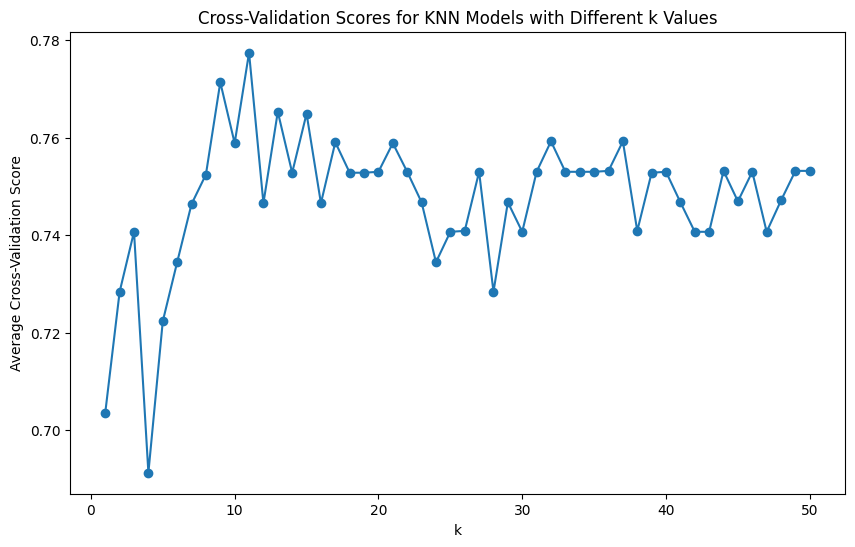

The k value that provides the highest cross-validation score is 11.
KNN Accuracy: 0.8048780487804879
Confusion Matrix:
 [[28  5]
 [ 3  5]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.85      0.88        33
         1.0       0.50      0.62      0.56         8

    accuracy                           0.80        41
   macro avg       0.70      0.74      0.72        41
weighted avg       0.82      0.80      0.81        41

Decision Tree Accuracy: 0.6341463414634146
Confusion Matrix:
 [[23 10]
 [ 5  3]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.70      0.75        33
         1.0       0.23      0.38      0.29         8

    accuracy                           0.63        41
   macro avg       0.53      0.54      0.52        41
weighted avg       0.71      0.63      0.66        41



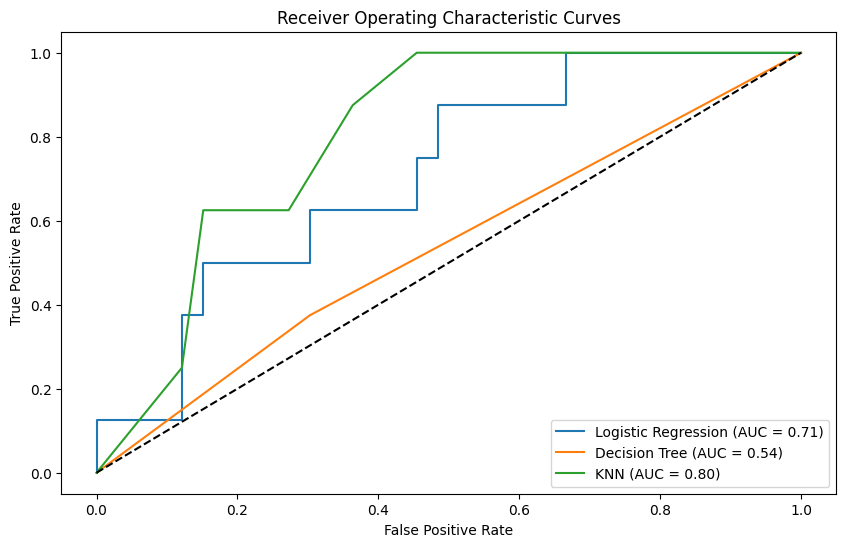

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# List to store the average cross-validation scores for each k
cv_scores = []

# Range of k values to try
k_values = list(range(1, 51))

for k in k_values:
    # Train a KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Perform cross-validation and store the average score
    cv_scores.append(np.mean(cross_val_score(knn, X_train, y_train, cv=5)))

# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.title('Cross-Validation Scores for KNN Models with Different k Values')
plt.xlabel('k')
plt.ylabel('Average Cross-Validation Score')
plt.show()

# Find the k value that provides the highest cross-validation score
best_k = k_values[np.argmax(cv_scores)]
print(f'The k value that provides the highest cross-validation score is {best_k}.')

# Train a KNN model with the best k value
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = best_knn.predict(X_test)

# Print the accuracy, confusion matrix, and classification report
print(f'KNN Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_knn)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_knn)}')

# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Print the accuracy, confusion matrix, and classification report
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_test, y_pred_dt)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred_dt)}')

# Plot the ROC curve for each model
plt.figure(figsize=(10, 6))
for model, name in [(log_reg, 'Logistic Regression'), (dt, 'Decision Tree'), (best_knn, 'KNN')]:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.title('Receiver Operating Characteristic Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.show()



#Hypotheses Testing



In [24]:
from scipy.stats import ttest_ind

# Separate the data into two groups
group1 = data[data['Dx'] == 1]  # Schizoaffective disorder
group0 = data[data['Dx'] == 0]  # Control group

# Perform a t-test for each neurocognitive measure
for measure in ['Speed', 'Attention', 'Memory', 'Verbal', 'Visual', 'ProbSolv', 'SocialCog']:
    t_stat, p_val = ttest_ind(group1[measure], group0[measure])
    print(f'{measure}: t = {t_stat:.2f}, p = {p_val:.4f}')


Speed: t = -7.12, p = 0.0000
Attention: t = -5.24, p = 0.0000
Memory: t = -4.71, p = 0.0000
Verbal: t = -6.41, p = 0.0000
Visual: t = -4.83, p = 0.0000
ProbSolv: t = -5.48, p = 0.0000
SocialCog: t = -6.05, p = 0.0000


In [25]:
# Print the coefficients of the logistic regression model
print('Logistic Regression Coefficients:')
for feature, coef in zip(X.columns, log_reg.coef_[0]):
    print(f'{feature}: {coef:.2f}')

# Print the feature importances of the decision tree model
print('\nDecision Tree Feature Importances:')
for feature, importance in zip(X.columns, dt.feature_importances_):
    print(f'{feature}: {importance:.2f}')


Logistic Regression Coefficients:
Speed: -0.95
Attention: -0.13
Memory: 0.94
Verbal: -0.77
Visual: 0.24
ProbSolv: -0.79
SocialCog: -0.81
Age: -0.34
Sex: -0.01

Decision Tree Feature Importances:
Speed: 0.33
Attention: 0.19
Memory: 0.05
Verbal: 0.09
Visual: 0.03
ProbSolv: 0.06
SocialCog: 0.17
Age: 0.08
Sex: 0.00


#Data Visualization

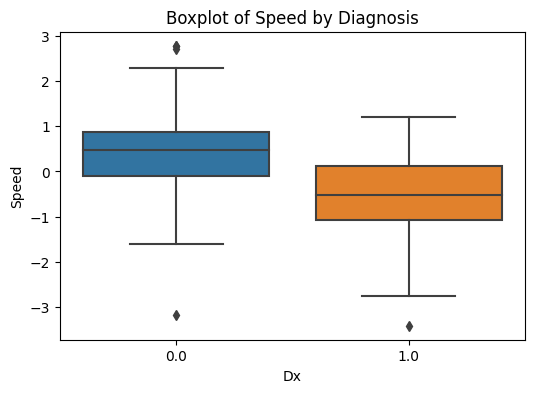

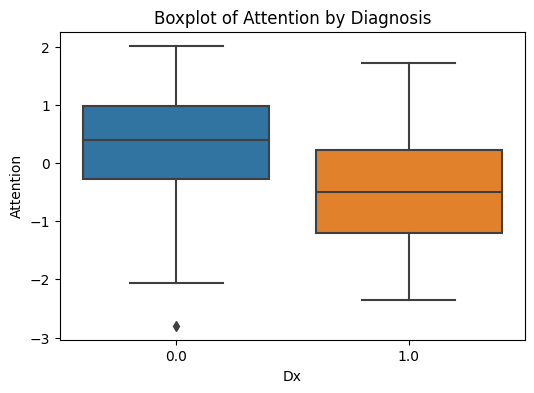

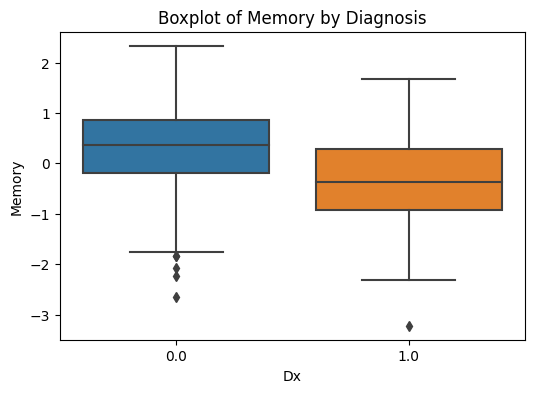

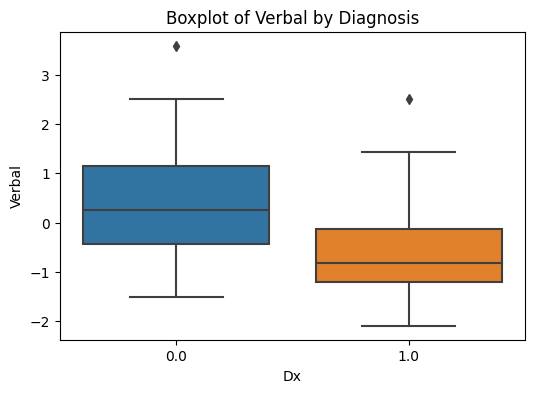

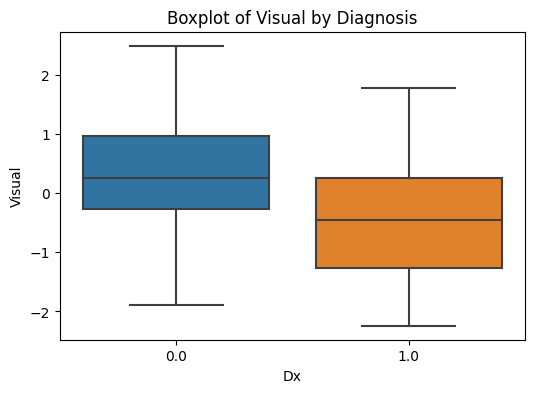

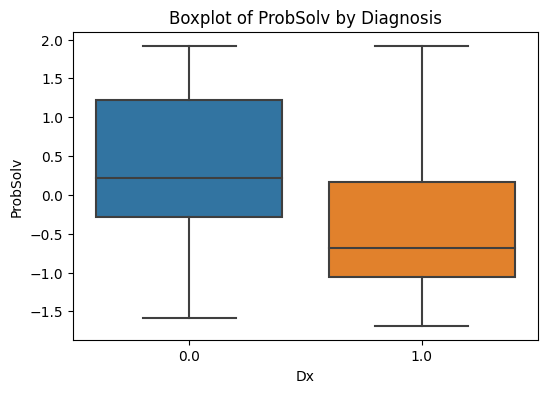

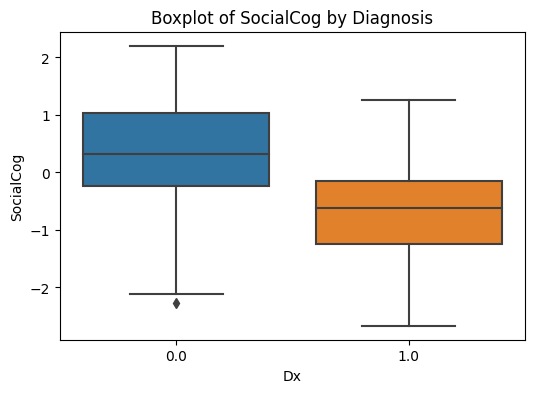

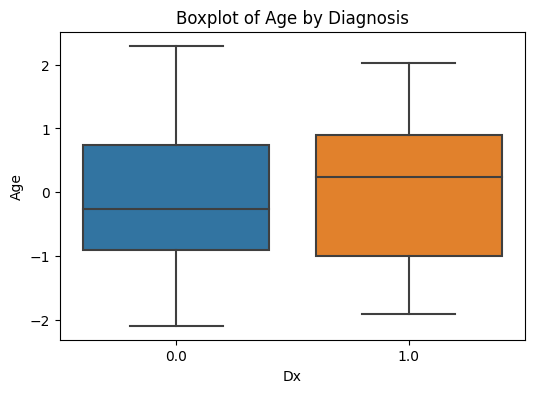

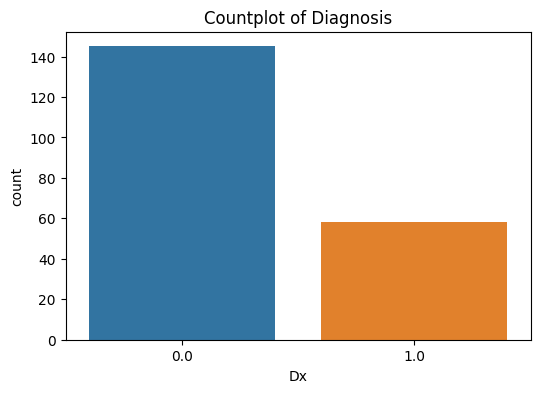

In [26]:
import seaborn as sns

# Boxplots for each feature by diagnosis
features = ['Speed', 'Attention', 'Memory', 'Verbal', 'Visual', 'ProbSolv', 'SocialCog', 'Age']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Dx', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Diagnosis')
    plt.show()

# Countplot for diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='Dx', data=data)
plt.title('Countplot of Diagnosis')
plt.show()

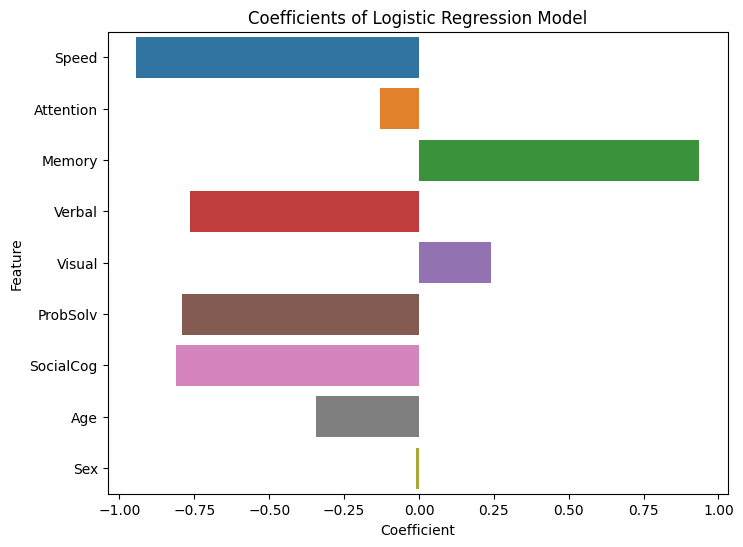

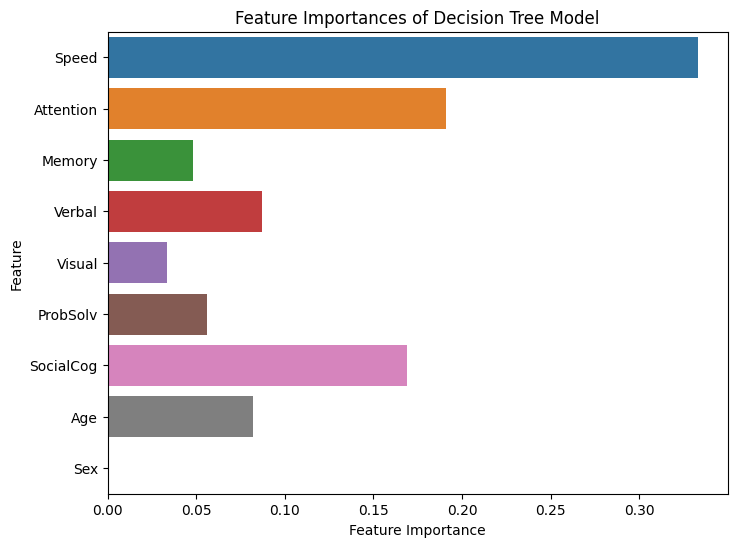

In [27]:
# Coefficients of logistic regression model
plt.figure(figsize=(8, 6))
sns.barplot(x=log_reg.coef_[0], y=X_train.columns)
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

# Feature importances of decision tree model
plt.figure(figsize=(8, 6))
sns.barplot(x=dt.feature_importances_, y=X_train.columns)
plt.title('Feature Importances of Decision Tree Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()
